Scene class successfully patched with enhanced quantum ray tracing
Creating scene...
Enhanced quantum ray tracing enabled
Rendering with quantum ray tracing...
Rendering...
Using quantum ray tracing


100% |########################################################################|


Render Took 16323.053023576736
Rendering with classical ray tracing for comparison...
Quantum ray tracing disabled
Rendering...


Render Took 13.110869407653809
Displaying comparison plot...


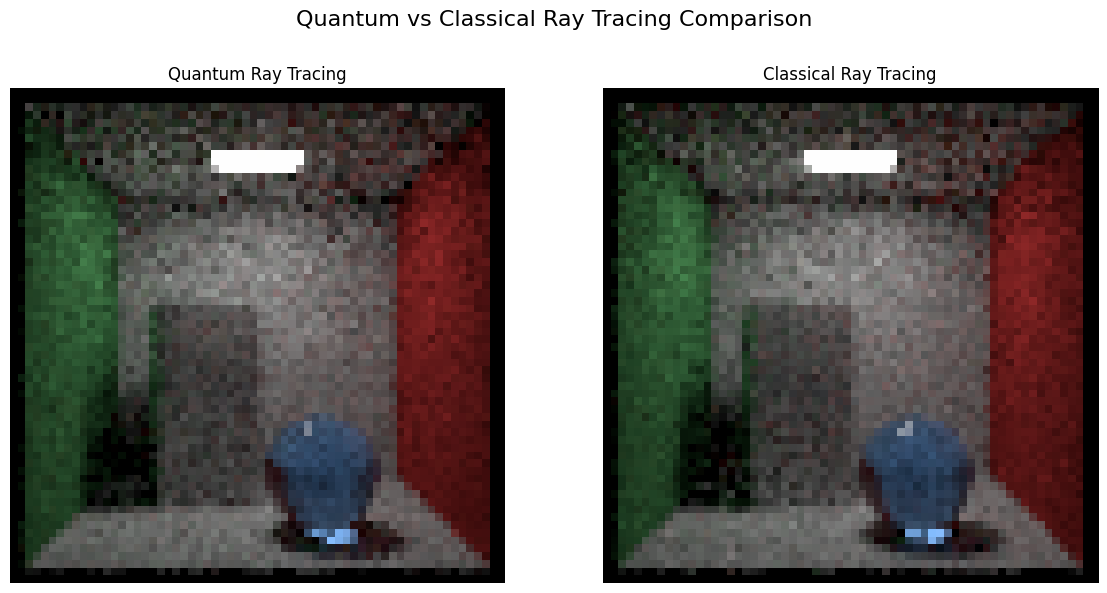

In [ ]:
from sightpy import *
from sightpy.quantum import QTraceConfig, patch_scene_class
import matplotlib.pyplot as plt

patch_scene_class()


# Create a simple scene
def create_scene():
    # Create a scene with quantum ray tracing enabled
    scene = Scene(ambient_color=rgb(0.05, 0.05, 0.05), use_quantum_raytracing=True)
    
    # Configure quantum ray tracing
    quantum_config = QTraceConfig(
        use_image_coherence=True,
        use_termination_criterion=True,
        max_iterations=1,
        shots_per_search=1024,
        debug=True  # Set to True for detailed logging
    )
    scene.enable_quantum_raytracing(quantum_config)
    
    # Add a camera
    scene.add_Camera(
        screen_width=64,
        screen_height=64,
        look_from = vec3(278, 278, 800),
        look_at = vec3(278,278,0), 
		focal_distance= 1.,
        field_of_view= 40
    )
    
    # Add materials
    green_diffuse = Diffuse(diff_color = rgb(.12, .45, .15))
    red_diffuse = Diffuse(diff_color = rgb(.65, .05, .05))
    white_diffuse = Diffuse(diff_color = rgb(.73, .73, .73))
    emissive_white = Emissive(color = rgb(15., 15., 15.))
    blue_glass = Refractive(n = vec3(1.5 + 0.05e-8j,1.5 +  0.02e-8j,1.5 +  0.j))
    
    # this is the light
    scene.add(Plane(material = emissive_white,  center = vec3(213 + 130/2, 554, -227.0 - 105/2), width = 130.0, height = 105.0, u_axis = vec3(1.0, 0.0, 0), v_axis = vec3(0.0, 0, 1.0)), 
                        importance_sampled = True)



    scene.add(Plane(material = white_diffuse,  center = vec3(555/2, 555/2, -555.0), width = 555.0,height = 555.0, u_axis = vec3(0.0, 1.0, 0), v_axis = vec3(1.0, 0, 0.0)))

    scene.add(Plane(material = green_diffuse,  center = vec3(-0.0, 555/2, -555/2), width = 555.0,height = 555.0,  u_axis = vec3(0.0, 1.0, 0), v_axis = vec3(0.0, 0, -1.0)))

    scene.add(Plane(material = red_diffuse,  center = vec3(555.0, 555/2, -555/2), width = 555.0,height = 555.0,  u_axis = vec3(0.0, 1.0, 0), v_axis = vec3(0.0, 0, -1.0)))

    scene.add(Plane(material = white_diffuse,  center = vec3(555/2, 555, -555/2), width = 555.0,height = 555.0,  u_axis = vec3(1.0, 0.0, 0), v_axis = vec3(0.0, 0, -1.0)))

    scene.add(Plane(material = white_diffuse,  center = vec3(555/2, 0., -555/2), width = 555.0,height = 555.0,  u_axis = vec3(1.0, 0.0, 0), v_axis = vec3(0.0, 0, -1.0)))


    cb = Cuboid( material = white_diffuse, center = vec3(182.5, 165, -285-160/2), width = 165,height = 165*2, length = 165, shadow = False)
    cb.rotate(θ = 15, u = vec3(0,1,0))
    scene.add(cb)

    scene.add(Sphere( material = blue_glass, center = vec3(370.5, 165/2, -65-185/2), radius = 165/2, shadow = False, max_ray_depth = 3),
                        importance_sampled = True)
    
    return scene

def main():
    import logging
    logging.basicConfig(level=logging.CRITICAL)
    
    print("Creating scene...")
    scene = create_scene()
    
    print("Rendering with quantum ray tracing...")
    # Render with low samples for testing
    img_quantum = scene.render(samples_per_pixel=5, progress_bar=True)
    
    # Compare with classical ray tracing
    print("Rendering with classical ray tracing for comparison...")
    scene.disable_quantum_raytracing()
    img_classical = scene.render(samples_per_pixel=5, progress_bar=True)
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img_quantum)
    plt.title("Quantum Ray Tracing")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(img_classical)
    plt.title("Classical Ray Tracing")
    plt.axis('off')
    
    plt.tight_layout()
    plt.suptitle("Quantum vs Classical Ray Tracing Comparison", fontsize=16)
    plt.subplots_adjust(top=0.85)
    
    print("Displaying comparison plot...")
    plt.show()

if __name__ == "__main__":
    main()